<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Can-animal-adoption-rates-be-predicted-from-their-Petfinder-profile?" data-toc-modified-id="Can-animal-adoption-rates-be-predicted-from-their-Petfinder-profile?-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Can animal adoption rates be predicted from their Petfinder profile?</a></span><ul class="toc-item"><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Data Analysis</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Random Forest</a></span><ul class="toc-item"><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li></ul></li><li><span><a href="#Xgboost" data-toc-modified-id="Xgboost-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Xgboost</a></span><ul class="toc-item"><li><span><a href="#Feature-Importance" data-toc-modified-id="Feature-Importance-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Feature Importance</a></span></li><li><span><a href="#Hyperparameter-Tuning" data-toc-modified-id="Hyperparameter-Tuning-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Hyperparameter Tuning</a></span></li></ul></li><li><span><a href="#Binary-Classification" data-toc-modified-id="Binary-Classification-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Binary Classification</a></span></li><li><span><a href="#CNN" data-toc-modified-id="CNN-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>CNN</a></span><ul class="toc-item"><li><span><a href="#VGG16-Model" data-toc-modified-id="VGG16-Model-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>VGG16 Model</a></span></li><li><span><a href="#Inception" data-toc-modified-id="Inception-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Inception</a></span></li><li><span><a href="#Xception" data-toc-modified-id="Xception-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Xception</a></span></li><li><span><a href="#Use-Features-from-Images-for-fitting" data-toc-modified-id="Use-Features-from-Images-for-fitting-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>Use Features from Images for fitting</a></span></li></ul></li><li><span><a href="#Wide-and-Deep" data-toc-modified-id="Wide-and-Deep-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Wide and Deep</a></span></li></ul></li></ul></div>

# Can animal adoption rates be predicted from their Petfinder profile?

The main goal of this project is to attempt to solve the problem of overcrowding in animal shelters by developing a model to determine which factors make animals more likely to get adopted.

Data from PetFinder.com will be analyzed to determine how an animal’s PetFinder profile affects the rates at which animals get adopted. The dataset was obtained from Kaggle (https://www.kaggle.com/c/petfinder-adoption-prediction/data). 

This solution can be used by animal shelters to help animals get adopted faster. This study focuses on photos and animal descriptions, which are features that can be directly altered by shelters to increase adoptability.

Methods used in this project:
    - Random forest
    - Xgboost
    - PCA
    - CNNs
    - Transfer learning
    - Wide and deep model


## Data Preparation

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns

import warnings
# Suppress annoying harmless error.
warnings.simplefilter('ignore')

In [2]:
df_all = pd.read_csv(r'C:\Users\julia\Dropbox\Data Science 2\Petfinder\train.csv')

In [3]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [4]:
df_all.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


In [4]:
# Add lenth of name column 

df_all.Name.fillna(0, inplace=True)
df_all.replace('No Name Yet',0,inplace=True)
df_all.dropna(inplace=True)

df_all['Name_Len']=df_all.Name.str.len()
df_all['Name_Len'].fillna(0, inplace=True)

In [5]:
# Add lenth of description column 
df_all['count'] = df_all['Description'].str.split().apply(len)

In [6]:
# One hot encode categorical data

categorical = ['Dewormed', 'Health', 'Breed1', 'Type', 'Breed2', 'State', 'Gender', 'Color1', 
                'Color2', 'Color3', 'MaturitySize', 'FurLength']

for feat in categorical:
    encoder = LabelEncoder()
    encoder.fit(df_all[feat].append(df_all[feat]))
    df_all[feat + '_encoded'] = encoder.transform(df_all[feat])

In [7]:
# Standardize numerical features
numerical = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt','Name_Len','count']

for feat in numerical:
    scaler = StandardScaler()    
    df_all[feat + '_std'] = scaler.fit_transform(np.array(df_all[feat]).reshape(-1,1))    

In [8]:
#all_features = categorical+numerical
X=pd.concat([df_all[[x + '_encoded' for x in categorical]],df_all[[x + '_std' for x in numerical]]],axis=1)

# Define outcome variable as the Adoption Speed
y = df_all['AdoptionSpeed']

In [9]:
# Check for any missing values in the dataset
X.isnull().values.any()

False

In [10]:
# Create training and validation sets. Use 20% of the data for testing.
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)

## Data Analysis

In [13]:
# Separate the dataset into cats and dogs.
df_dog=df_all[df_all.Type==1]
df_cat=df_all[df_all.Type==2]

# Obtain counts for each adoption speed
dog_counts = df_dog['AdoptionSpeed'].value_counts(sort=False).sort_index()
cat_counts = df_cat['AdoptionSpeed'].value_counts(sort=False).sort_index()
all_counts = df_all['AdoptionSpeed'].value_counts(sort=False).sort_index()

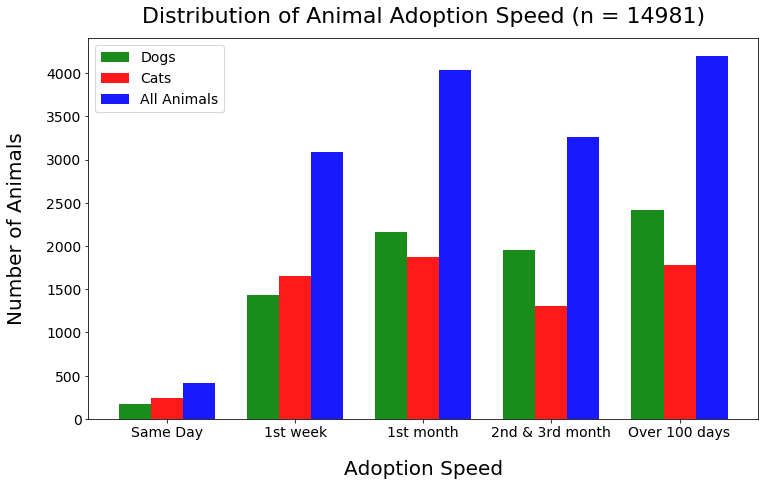

In [14]:
# create plot
fig, ax = plt.subplots(figsize=(12, 7))
labels = ('Same Day', '1st week', '1st month', '2nd & 3rd month', 'Over 100 days')
index = np.arange(len(labels))
bar_width = 0.25
opacity = 0.9
 
rects1 = plt.bar(index , dog_counts, bar_width,
alpha=opacity,
color='g',
label='Dogs')

rects2 = plt.bar(index + bar_width, cat_counts, bar_width,
alpha=opacity,
color='r',
label='Cats')
     
rects3 = plt.bar(index + 2*bar_width, all_counts, bar_width,
alpha=opacity,
color='b',
label='All Animals')
 
plt.xlabel('Adoption Speed',fontsize=20, labelpad=20)
plt.ylabel('Number of Animals',fontsize=20, labelpad=20)
plt.title('Distribution of Animal Adoption Speed (n = ' + str(len(df_all)) + ')',
          fontsize=22,y=1.025)
plt.xticks(index + bar_width, labels,fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc=2, prop={'size': 14})

plt.show()

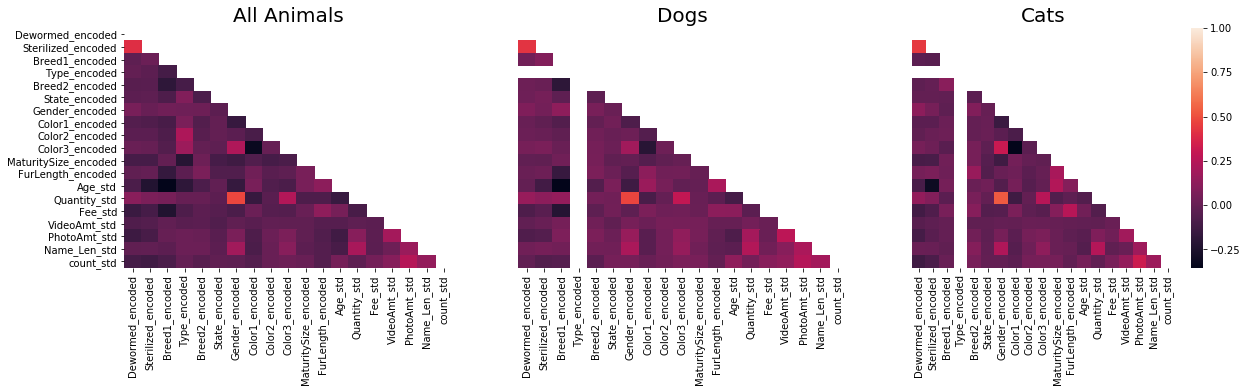

In [15]:
# Create a heatmap describing the correlation between different factors

# Set up the matplotlib figure.
plt.figure(figsize=(20,15))

# Make the correlation matrix for all animals
corr_mat_all = X.corr()
mask_all = np.zeros_like(corr_mat_all, dtype=np.bool)
mask_all[np.triu_indices_from(mask_all)] = True
plt.subplot(3,3,1)
sns.heatmap(corr_mat_all, mask=mask_all, cbar=False)
plt.title('All Animals',fontsize=20)

# Make the correlation matrix for dogs
corr_mat_dog = X[df_all.Type==1].corr()
mask_dog = np.zeros_like(corr_mat_dog, dtype=np.bool)
mask_dog[np.triu_indices_from(mask_dog)] = True
plt.subplot(3,3,2)
sns.heatmap(corr_mat_dog, mask=mask_dog, cbar=False, yticklabels=False)
plt.title('Dogs',fontsize=20)


# Make the correlation matrix for cats
corr_mat_cat = X[df_all.Type==2].corr()
mask_cat = np.zeros_like(corr_mat_cat, dtype=np.bool)
mask_cat[np.triu_indices_from(mask_cat)] = True
plt.subplot(3,3,3)
sns.heatmap(corr_mat_cat, mask=mask_cat, yticklabels=False)
plt.title('Cats',fontsize=20)

plt.show()


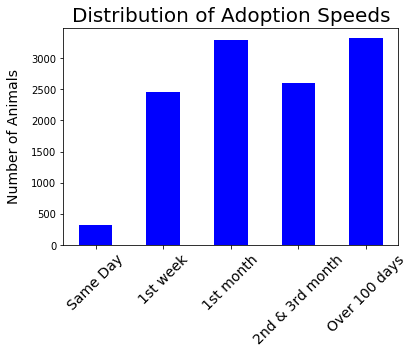

In [16]:
labels = ['Same Day', '1st week', '1st month', '2nd & 3rd month', 'Over 100 days']
index = np.arange(len(labels))
plt.hist(y_train,bins = np.arange(6)-.5, rwidth=.5, color='b')
plt.xticks(index, labels,fontsize=14,rotation = 45)
plt.title('Distribution of Adoption Speeds',fontsize=20)
plt.ylabel('Number of Animals',fontsize=14, labelpad=10)
plt.show()

In [17]:
# Due to the class imbalance in the animal adoption rate outcome, 
# SMOTE will be used to oversample the training set.
from imblearn.over_sampling import SMOTENC
columns = X_train.columns
sm = SMOTENC(categorical_features=[0,1,2,3,4], random_state=0)
X_train, y_train = sm.fit_sample(X_train, y_train) 
X_train = pd.DataFrame(data=X_train, columns=columns)

Using TensorFlow backend.


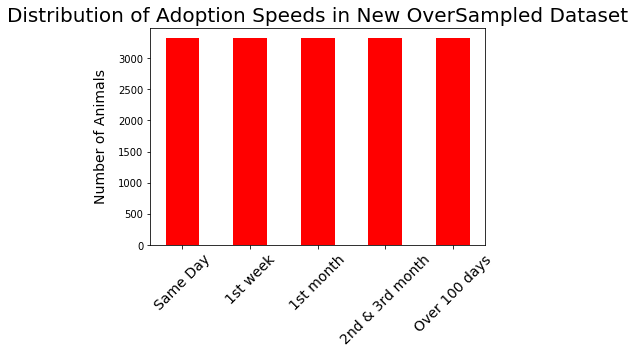

In [18]:
labels = ['Same Day', '1st week', '1st month', '2nd & 3rd month', 'Over 100 days']
index = np.arange(len(labels))
plt.hist(y_train,bins = np.arange(6)-.5, rwidth=.5, color='r')
plt.xticks(index, labels,fontsize=14,rotation = 45)
plt.title('Distribution of Adoption Speeds in New OverSampled Dataset',fontsize=20)
plt.ylabel('Number of Animals',fontsize=14, labelpad=10)
plt.show()

## Random Forest  

In [11]:
# Define a function to evaluate each model
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve 
from sklearn.model_selection import cross_val_score
def model_eval(model, X_train, y_train, X_test, y_test, pred, model_type='Multiclass'):
    if model_type == 'Binary':
        labels = ['Less than 100 days', 'Over 100 days']
        print('what')
    else:   
        labels = ['Same Day', '1st week', '1st month', '2nd & 3rd month', 'Over 100 days']
        
    print('Training set accuracy:\t\t', round(model.score(X_train, y_train),2))
    print('Validation set accuracy:\t\t\t', round(model.score(X_test, y_test),2))
    
    conf_mat = confusion_matrix(y_test, pred)
    
    cv = cross_val_score(model, X_train, y_train, cv=5) 
    print('\nCross validation results: {:.3}+/-{:.3}  \n \n '.format(cv.mean(), 2*cv.std()))
    
    print(classification_report(y_test, pred))
    
    plt.figure(figsize = (12,8)) 
    sns.heatmap(conf_mat,annot=True,annot_kws={"size": 15}, fmt='d',cmap='GnBu',cbar =False,
                xticklabels=labels,yticklabels=labels)
    plt.xlabel('Target', fontsize=20)     
    plt.ylabel('Predicted', fontsize=20) 
    
    model_name = str(model)
    ind=model_name.index('(')
    plt.title(model_name[0:ind], fontsize=24,y=1.025)
    plt.show()
    
    
    return cv

Training set accuracy:		 0.98
Validation set accuracy:			 0.38

Cross validation results: 0.365+/-0.022  
 
 
              precision    recall  f1-score   support

           0       0.38      0.14      0.20        81
           1       0.33      0.38      0.35       640
           2       0.32      0.37      0.34       739
           3       0.31      0.25      0.28       665
           4       0.52      0.50      0.51       872

    accuracy                           0.38      2997
   macro avg       0.37      0.33      0.34      2997
weighted avg       0.38      0.38      0.37      2997



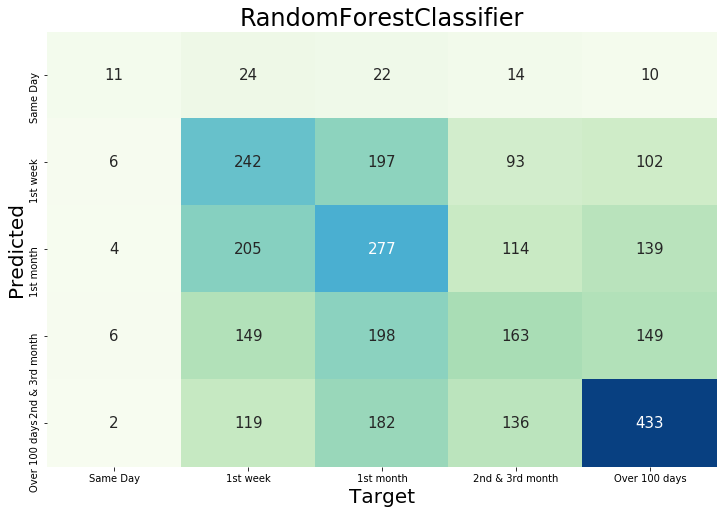

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier() 
rfc.fit(X_train, y_train) 
pred_rfc =rfc.predict(X_val) 
rfc_cv_scores = model_eval(rfc,X_train, y_train, X_val, y_val, rfc.predict(X_val))

Training set accuracy:		 0.48
Validation set accuracy:			 0.4

Cross validation results: 0.389+/-0.0212  
 
 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.34      0.25      0.29       640
           2       0.32      0.43      0.37       739
           3       0.43      0.18      0.26       665
           4       0.49      0.68      0.57       872

    accuracy                           0.40      2997
   macro avg       0.31      0.31      0.30      2997
weighted avg       0.39      0.40      0.37      2997



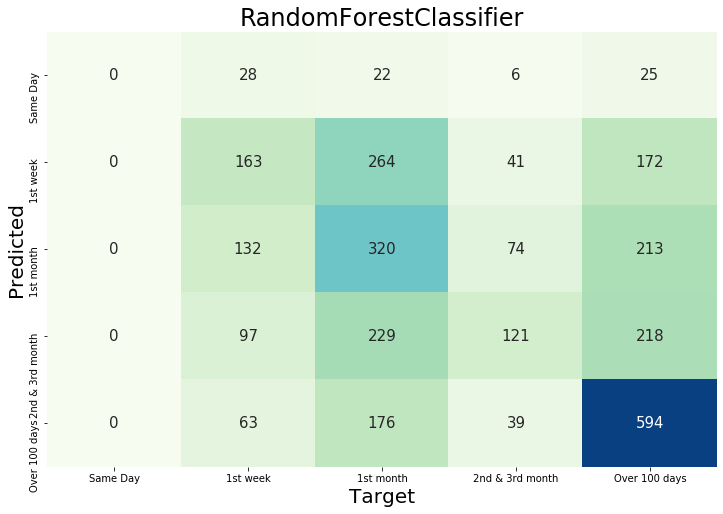

In [18]:
# Try tuning the min_samples_leaf hyper-parameter to reduce overfitting
rfc = RandomForestClassifier(min_samples_leaf=25) 
rfc.fit(X_train, y_train) 
pred_rfc =rfc.predict(X_val) 
rfc_cv_scores = model_eval(rfc,X_train, y_train, X_val, y_val, rfc.predict(X_val))

### Feature Selection

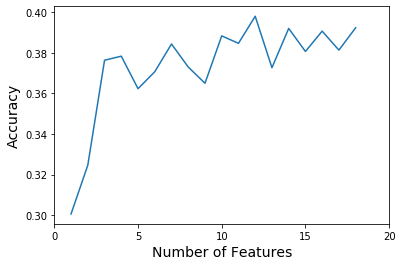

In [19]:
from sklearn.feature_selection import f_classif, f_regression, SelectKBest

rfc_accuracy = []
for k in range(1,len(X_train.columns)):
    selector = SelectKBest(f_classif, k=k)
    selector.fit_transform(X_train, y_train)
    names = X_train.columns.values[selector.get_support()]
    scores = selector.scores_[selector.get_support()]
    names_scores = list(zip(names, scores))
    df_features = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
    best_Kfeatures = list(df_features.sort_values(['F_Scores', 'Feat_names'], 
                                                  ascending = [False, True])['Feat_names']) 
    rfc.fit(X_train[best_Kfeatures],y_train)    
    rfc_accuracy.append(rfc.score(X_val[best_Kfeatures],y_val))

plt.plot(range(1,len(rfc_accuracy)+1),rfc_accuracy)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Number of Features', fontsize=14)
plt.xticks(np.linspace(0,20,5))
plt.show()


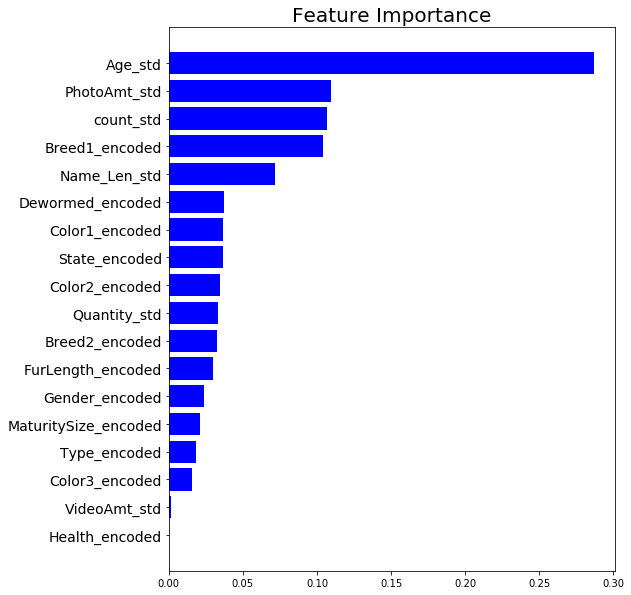

In [20]:
temp = rfc.feature_importances_
df_imp = pd.DataFrame(temp)
df_imp.columns=["importance"] 
df_imp["labels"] = best_Kfeatures
df_imp.sort_values("importance",inplace=True)

index2 = np.arange(len(df_imp))
fig = plt.figure(figsize=(8, 10)) 
plt.subplot('111') 
rects = plt.barh(index2, df_imp["importance"], color= 'b') 
plt.title('Feature Importance', fontsize=20)
plt.yticks(index2, df_imp["labels"], fontsize=14) 
 
plt.show() 

Training set accuracy:		 0.41
Validation set accuracy:			 0.37

Cross validation results: 0.369+/-0.0115  
 
 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.32      0.25      0.28       640
           2       0.30      0.48      0.37       739
           3       0.30      0.12      0.18       665
           4       0.48      0.58      0.52       872

    accuracy                           0.37      2997
   macro avg       0.28      0.28      0.27      2997
weighted avg       0.35      0.37      0.34      2997



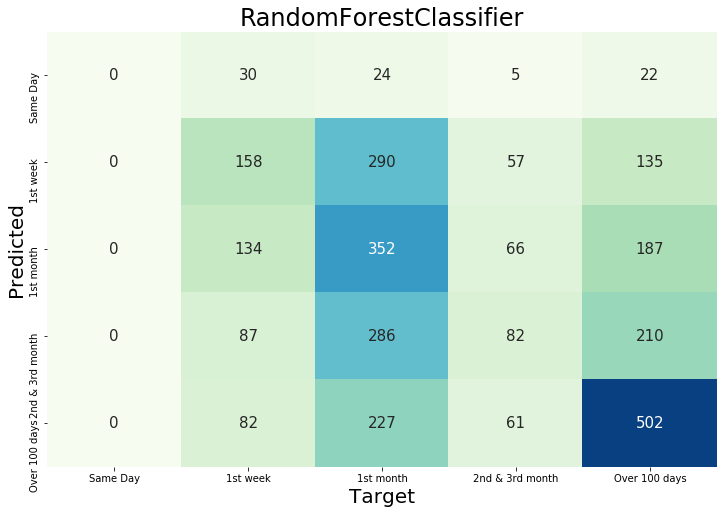

In [22]:
rfc_bestK = RandomForestClassifier(min_samples_leaf=25) 
rfc_bestK.fit(X_train[best_Kfeatures[:5]], y_train) 
rfc_bestK_scores = model_eval(rfc_bestK,X_train[best_Kfeatures[:5]], y_train,
                              X_val[best_Kfeatures[:5]], y_val, 
                              rfc_bestK.predict(X_val[best_Kfeatures[:5]]))

Removing Kbest features, did not reduce overfitting in the random forest classifier

### PCA

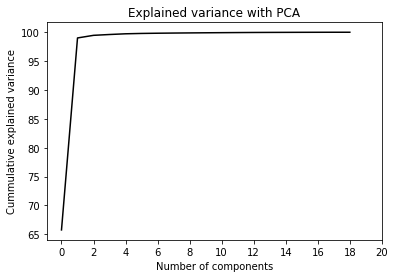

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=19)
X_PCA = pca.fit_transform(X_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100., color='k')
plt.xlabel('Number of components')
plt.ylabel('Cummulative explained variance')
plt.title('Explained variance with PCA')
plt.xticks(np.linspace(0,20,11))
plt.show()

Since the features are a combination of numerical and categorical, the results above are likely inaccurate. Due to the difficulty in performing PCA on categorical features, PCA will only be performed on the numerical features here.

In [48]:
numerical_feat = [X_train[feat + '_std'] for feat in numerical]
numerical_feat=pd.DataFrame((list(map(list, zip(*numerical_feat)))))

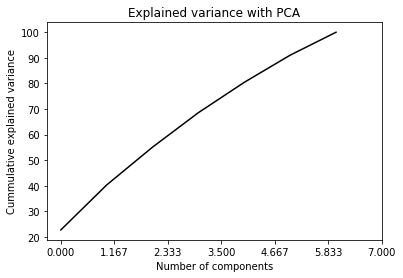

In [58]:
pca = PCA(n_components=numerical_feat.shape[1])
X_PCA = pca.fit_transform(numerical_feat)
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100., color='k')
plt.xlabel('Number of components')
plt.ylabel('Cummulative explained variance')
plt.title('Explained variance with PCA')
plt.xticks(np.linspace(0,numerical_feat.shape[1],numerical_feat.shape[1]))
plt.show()

In [59]:
n_components = 2
np.sum(pca.explained_variance_ratio_[:n_components])

0.4035733569208816

Training set accuracy:		 0.42
Validation set accuracy:			 0.3

Cross validation results: 0.315+/-0.0148  
 
 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.00      0.00      0.00       640
           2       0.41      0.01      0.02       739
           3       0.30      0.13      0.18       665
           4       0.30      0.92      0.45       872

    accuracy                           0.30      2997
   macro avg       0.20      0.21      0.13      2997
weighted avg       0.25      0.30      0.17      2997



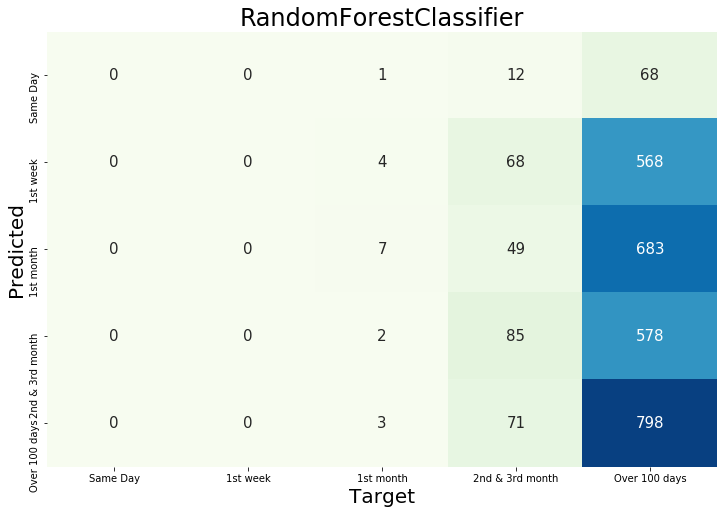

In [60]:
X_train_PCA = X_PCA[:,:n_components]
X_val_PCA = pca.fit_transform(X_val)
X_val_PCA = X_val_PCA[:,:n_components]

X_train_PCA = pd.DataFrame(X_train_PCA)
X_val_PCA = pd.DataFrame(X_val_PCA)
pca_rfc = RandomForestClassifier(min_samples_leaf=25)
pca_rfc.fit(X_train_PCA, y_train)
pca_rfc.score(X_val_PCA, y_val)
pca_rfc_score = model_eval(pca_rfc,X_train_PCA, y_train, X_val_PCA, y_val, pca_rfc.predict(X_val_PCA))

### Hyperparameter Tuning

Training set accuracy:		 0.51
Validation set accuracy:			 0.4

Cross validation results: 0.403+/-0.0119  
 
 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        81
           1       0.37      0.23      0.28       640
           2       0.32      0.49      0.39       739
           3       0.40      0.15      0.22       665
           4       0.49      0.69      0.57       872

    accuracy                           0.40      2997
   macro avg       0.32      0.31      0.29      2997
weighted avg       0.39      0.40      0.37      2997



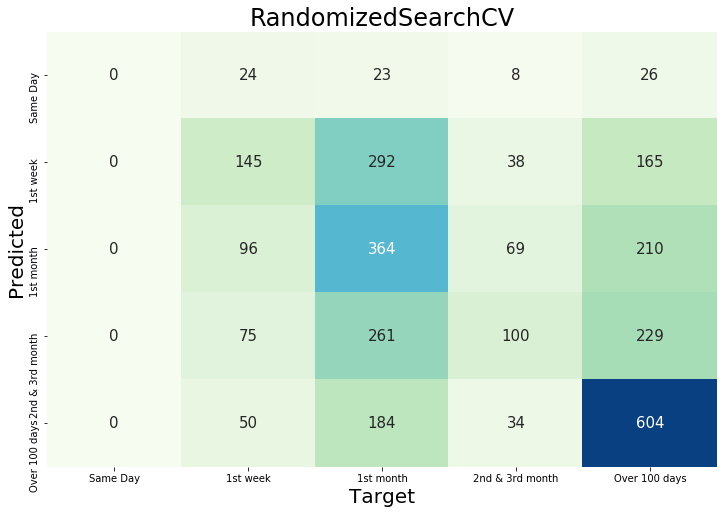

array([0.40892038, 0.40909091, 0.39449541, 0.40375783, 0.39724311])

In [66]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {'max_depth': [20, 50, 100],
              'min_samples_leaf': [25],
              
              'n_estimators': [10, 100],
              'criterion': ['gini', 'entropy']}
grid_rfc = RandomizedSearchCV(rfc, param_grid, return_train_score=False, n_jobs=-1, 
                              cv=5, scoring='accuracy')
grid_rfc.fit(X_train, y_train)

model_eval(grid_rfc,X_train, y_train, X_val, y_val, grid_rfc.predict(X_val))

## Xgboost

Training set accuracy:		 0.51
Validation set accuracy:			 0.4

Cross validation results: 0.459+/-0.075  
 
 
              precision    recall  f1-score   support

           0       0.14      0.02      0.04        81
           1       0.35      0.37      0.36       640
           2       0.33      0.36      0.34       739
           3       0.33      0.22      0.26       665
           4       0.51      0.63      0.56       872

    accuracy                           0.40      2997
   macro avg       0.33      0.32      0.31      2997
weighted avg       0.38      0.40      0.38      2997



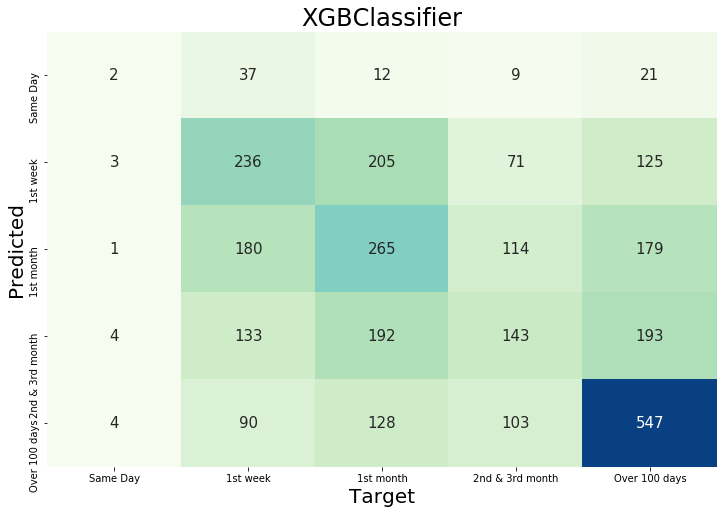

In [38]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
pred_xgb = xgb.predict(X_val)
xgb_cv_scores=model_eval(xgb,X_train, y_train, X_val, y_val, xgb.predict(X_val))

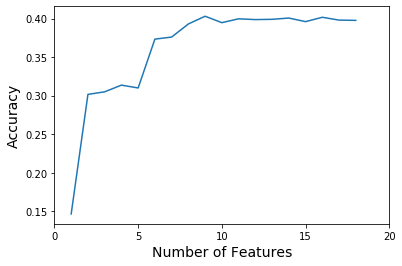

In [39]:
xgb_accuracy = []
for k in range(1,len(X_train.columns)):
    selector = SelectKBest(f_classif, k=k)
    selector.fit_transform(X_train, y_train)
    names = X_train.columns.values[selector.get_support()]
    scores = selector.scores_[selector.get_support()]
    names_scores = list(zip(names, scores))
    df_features = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
    best_Kfeatures = list(df_features.sort_values(['F_Scores', 'Feat_names'], 
                                                  ascending = [False, True])['Feat_names']) 
    xgb.fit(X_train[best_Kfeatures],y_train)    
    xgb_accuracy.append(xgb.score(X_val[best_Kfeatures],y_val))

plt.plot(range(1,len(xgb_accuracy)+1),xgb_accuracy)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Number of Features', fontsize=14)
plt.xticks(np.linspace(0,20,5))
plt.show()


### Feature Importance

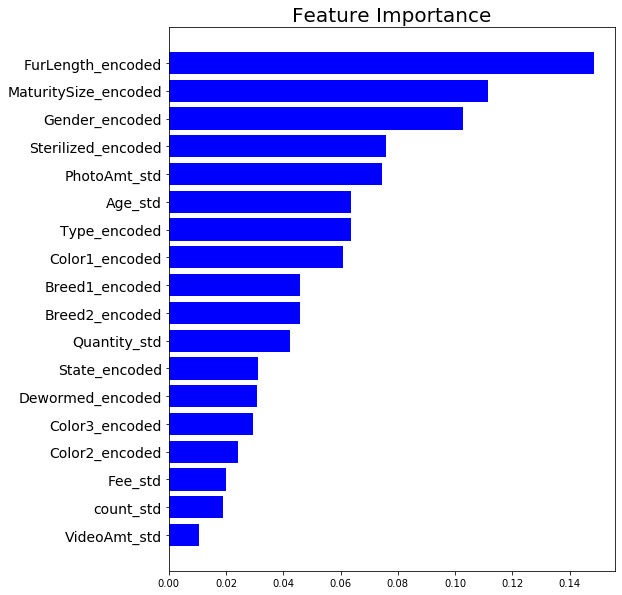

In [40]:
temp = xgb.feature_importances_
df_imp = pd.DataFrame(temp)
df_imp.columns=["importance"] 
df_imp["labels"] = best_Kfeatures
df_imp.sort_values("importance",inplace=True)

index2 = np.arange(len(df_imp))
fig = plt.figure(figsize=(8, 10)) 
plt.subplot('111') 
rects = plt.barh(index2, df_imp["importance"], color= 'b') 
plt.title('Feature Importance', fontsize=20)
plt.yticks(index2, df_imp["labels"], fontsize=14) 
 
plt.show() 

Training set accuracy:		 0.49
Validation set accuracy:			 0.39

Cross validation results: 0.447+/-0.0673  
 
 
              precision    recall  f1-score   support

           0       0.07      0.02      0.04        81
           1       0.34      0.36      0.35       640
           2       0.32      0.36      0.34       739
           3       0.35      0.22      0.27       665
           4       0.51      0.62      0.56       872

    accuracy                           0.39      2997
   macro avg       0.32      0.32      0.31      2997
weighted avg       0.38      0.39      0.38      2997



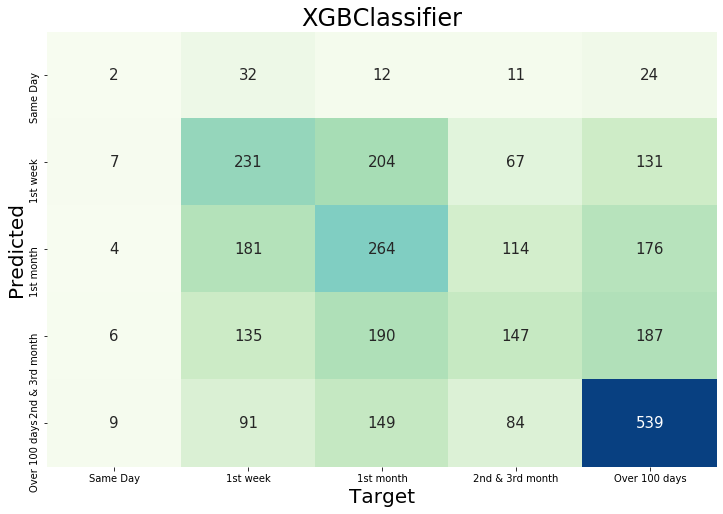

In [42]:
xgb_bestK = XGBClassifier()
xgb_bestK.fit(X_train[best_Kfeatures[:10]], y_train) 
xgb_bestK = model_eval(xgb_bestK,X_train[best_Kfeatures[:10]], 
                       y_train, X_val[best_Kfeatures[:10]], 
                       y_val, xgb_bestK.predict(X_val[best_Kfeatures[:10]]))

### Hyperparameter Tuning

Training set accuracy:		 1.0
Validation set accuracy:			 0.41

Cross validation results: 0.518+/-0.0763  
 
 
              precision    recall  f1-score   support

           0       0.20      0.07      0.11        81
           1       0.38      0.37      0.37       640
           2       0.34      0.37      0.35       739
           3       0.34      0.28      0.30       665
           4       0.53      0.61      0.56       872

    accuracy                           0.41      2997
   macro avg       0.36      0.34      0.34      2997
weighted avg       0.40      0.41      0.40      2997



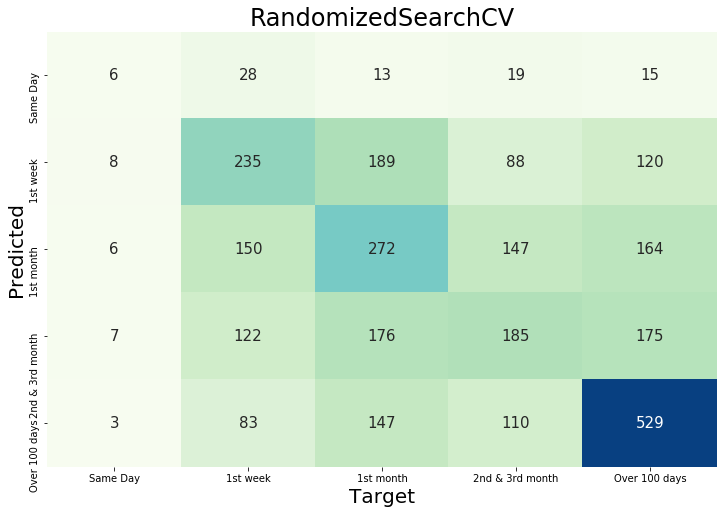

array([0.44360902, 0.53192771, 0.52801205, 0.55090361, 0.5373494 ])

In [46]:
param_grid = {'max_depth': [20, 50, 100],
              'min_samples_leaf': [1, 2],
              'min_samples_split': [2, 3],
              'n_estimators': [10, 100],
              'criterion': ['gini', 'entropy']}
grid_xgb = RandomizedSearchCV(xgb, param_grid, return_train_score=False, 
                              n_jobs=-1, cv=5, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

model_eval(grid_xgb,X_train, y_train, X_val, y_val, grid_xgb.predict(X_val))

## Binary Classification

In [13]:
# Split the data into adopted in under 100 days and over 100 days
df_all['binary']= np.where(df_all.AdoptionSpeed<4, 0, 1)
y_binary = df_all['binary']
X_train_binary, X_val_binary, y_train_binary, y_val_binary = train_test_split(
    X, y_binary, test_size=0.2, random_state=0)

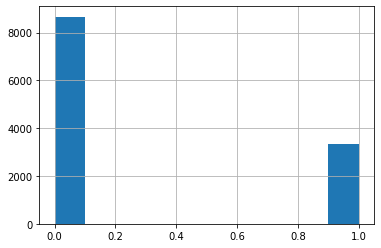

In [213]:
y_train_binary.hist()

what
Training set accuracy:		 0.77
Validation set accuracy:			 0.75

Cross validation results: 0.758+/-0.00615  
 
 
              precision    recall  f1-score   support

           0       0.74      0.01      0.02      2125
           1       0.29      0.23      0.25       872
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.07      2997
   macro avg       0.21      0.05      0.05      2997
weighted avg       0.61      0.07      0.09      2997



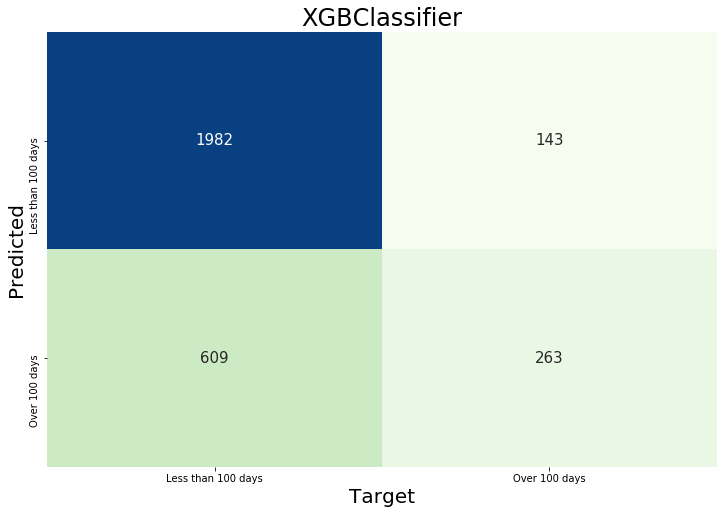

In [224]:
xgb_binary = XGBClassifier()
xgb_binary.fit(X_train_binary,y_train_binary)
pred_xgb_binary = xgb_binary.predict(X_val_binary)
xgb_binary_cv_scores=model_eval(xgb_binary,X_train_binary,
                                y_train_binary, X_val_binary, 
                                y_val_binary, pred_xgb_binary,
                                'Binary')

In [229]:
# Use SMOTE to oversample the training set
sm = SMOTENC(categorical_features=[0,1], random_state=0)
X_train_sm, y_train_sm = sm.fit_sample(X_train_binary, y_train_binary) 
X_train_sm = pd.DataFrame(data=X_train_sm, columns=columns)

what
Training set accuracy:		 0.82
Validation set accuracy:			 0.74

Cross validation results: 0.795+/-0.248  
 
 
              precision    recall  f1-score   support

           0       0.74      0.01      0.02      2125
           1       0.29      0.23      0.25       872
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.07      2997
   macro avg       0.21      0.05      0.05      2997
weighted avg       0.61      0.07      0.09      2997



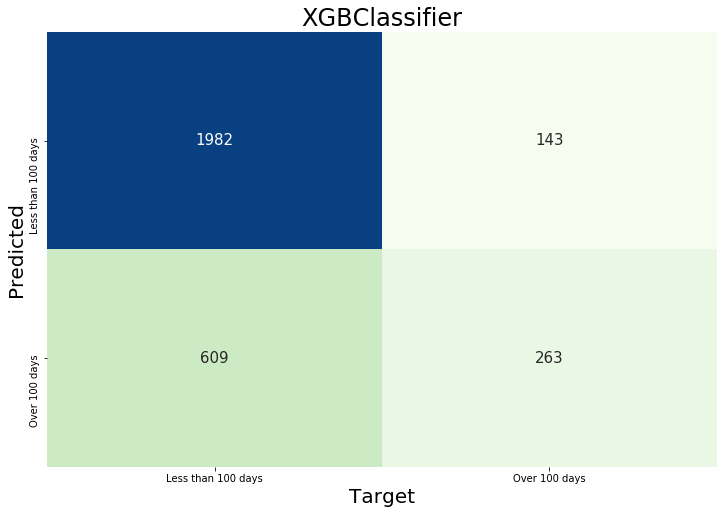

In [232]:
# Run Xgboost on oversampled binary case
xgb_binary_sm = XGBClassifier()
xgb_binary_sm.fit(X_train_sm,y_train_sm)
pred_xgb_binary_sm = xgb_binary.predict(X_val_binary)
xgb_binary_sm_cv_scores=model_eval(xgb_binary_sm,
                                   X_train_sm, 
                                   y_train_sm,
                                   X_val_binary, 
                                   y_val_binary, 
                                   pred_xgb_binary_sm,
                                   'Binary')

## CNN

In [233]:
# Load stored images from Data Preparation Notebook

import pickle

X= pickle.load( open( "X.p", "rb")) # image data
X=np.array(X)
X2= pickle.load( open( "X2.p","rb")) # rest of data
# to avoid oversampling split the adoption speed at 3
X2['Binary']=np.where(X2.AdoptionSpeed<3,0,1) 

In [40]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop, Adam, SGD
from keras.regularizers import l2

# Import the backend
from keras import backend as K
   

In [253]:
# First try a simple 3 block VGG model

K.clear_session()
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', 
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform',
                kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='sigmoid'))

In [254]:
from keras.preprocessing.image import ImageDataGenerator

batch_size=32

y_img = X2['Binary']
X_train_img,X_val_img, y_train_img, y_val_img=train_test_split(
    X,y_img,test_size=0.2,random_state=0)

X_train_img=X_train_img[- X_train_img.shape[0]%batch_size:]
X_val_img=X_val_img[- X_val_img.shape[0]%batch_size:]
y_train_img=y_train_img[- y_train_img.shape[0]%batch_size:]
y_val_img=y_val_img[- y_val_img.shape[0]%batch_size:]

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

train_generator =  train_datagen.flow(X_train_img,y_train_img,batch_size=batch_size)
validation_generator =  test_datagen.flow(X_val_img,y_val_img,batch_size=batch_size)


In [255]:
model.compile(optimizer=Adam(lr=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [256]:
history2=model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch =  X_train.shape[0]/batch_size,
            epochs=10,
            validation_steps = X_val.shape[0]/batch_size
            )

Epoch 1/10
374/374 [==============================] - 369s 987ms/step - loss: 3.7195 - accuracy: 0.5030 - val_loss: 1.0381 - val_accuracy: 0.5051
Epoch 2/10
374/374 [==============================] - 327s 874ms/step - loss: 0.8555 - accuracy: 0.5029 - val_loss: 0.7661 - val_accuracy: 0.5014
Epoch 3/10
374/374 [==============================] - 318s 850ms/step - loss: 0.7215 - accuracy: 0.5080 - val_loss: 0.7059 - val_accuracy: 0.5068
Epoch 4/10
374/374 [==============================] - 317s 848ms/step - loss: 0.6978 - accuracy: 0.5039 - val_loss: 0.6954 - val_accuracy: 0.5037
Epoch 5/10
374/374 [==============================] - 317s 847ms/step - loss: 0.6938 - accuracy: 0.5018 - val_loss: 0.6936 - val_accuracy: 0.5044
Epoch 6/10
374/374 [==============================] - 319s 852ms/step - loss: 0.6933 - accuracy: 0.5076 - val_loss: 0.6932 - val_accuracy: 0.4936
Epoch 7/10
374/374 [==============================] - 320s 856ms/step - loss: 0.6931 - accuracy: 0.5056 - val_loss: 0.6932 -

In [270]:
model.save('vgg.h5')

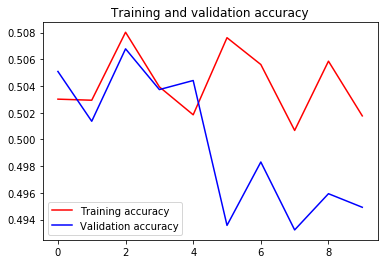

<Figure size 432x288 with 0 Axes>

In [466]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

### VGG16 Model

In [257]:
from keras.applications.vgg16 import VGG16
K.clear_session()
pre_trained_model = VGG16(include_top=False, input_shape=(150, 150, 3)) 
for layer in pre_trained_model.layers:
    layer.trainable = False
x = Flatten()(pre_trained_model.layers[-1].output)
x = Dense(1024, activation='relu', kernel_initializer='he_uniform',
          kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)  
x = Dense(1, activation='sigmoid')(x)

58892288/58889256 [==============================] - 6s 0us/step


In [258]:
VGG16_model = Model(pre_trained_model.input, outputs=x) 
VGG16_model.compile(optimizer=Adam(lr=0.01), loss = 'binary_crossentropy', 
                    metrics = ['accuracy'])

In [259]:
VGG16_history2=VGG16_model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch =  X_train.shape[0]/batch_size,
            epochs=10,
            validation_steps = X_val.shape[0]/batch_size
            )

Epoch 1/10
374/374 [==============================] - 819s 2s/step - loss: 1.8568 - accuracy: 0.5284 - val_loss: 0.6897 - val_accuracy: 0.5671
Epoch 2/10
374/374 [==============================] - 816s 2s/step - loss: 0.7024 - accuracy: 0.5049 - val_loss: 0.6992 - val_accuracy: 0.4953
Epoch 3/10
374/374 [==============================] - 815s 2s/step - loss: 0.6949 - accuracy: 0.5006 - val_loss: 0.6944 - val_accuracy: 0.5058
Epoch 4/10
374/374 [==============================] - 816s 2s/step - loss: 0.6960 - accuracy: 0.5091 - val_loss: 0.6879 - val_accuracy: 0.5068
Epoch 5/10
374/374 [==============================] - 816s 2s/step - loss: 0.6940 - accuracy: 0.5025 - val_loss: 0.6924 - val_accuracy: 0.5010
Epoch 6/10
374/374 [==============================] - 816s 2s/step - loss: 0.6935 - accuracy: 0.5057 - val_loss: 0.6927 - val_accuracy: 0.5027
Epoch 7/10
374/374 [==============================] - 815s 2s/step - loss: 0.6932 - accuracy: 0.5079 - val_loss: 0.6866 - val_accuracy: 0.5041

In [269]:
VGG16_model.save('VGG16_model.h5')

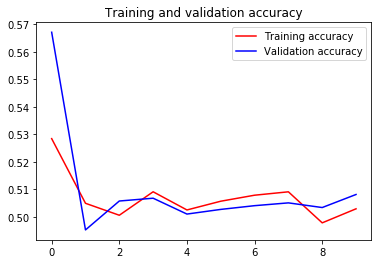

<Figure size 432x288 with 0 Axes>

In [467]:
acc = VGG16_history2.history['accuracy']
val_acc = VGG16_history2.history['val_accuracy']
loss = VGG16_history2.history['loss']
val_loss = VGG16_history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

### Inception

In [260]:
from keras.applications.inception_v3 import InceptionV3
K.clear_session()
pre_trained_model = InceptionV3(include_top=False, input_shape=(150, 150, 3) , 
                                weights='imagenet')  
for layer in pre_trained_model.layers:
    layer.trainable = False
x = Flatten()(pre_trained_model.layers[-1].output)
x = Dense(1024, activation='relu', kernel_initializer='he_uniform',
          kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)  
x = Dense(1, activation='sigmoid')(x)

In [261]:
InceptionV3_model = Model(pre_trained_model.input, outputs=x) 
InceptionV3_model.compile(optimizer=Adam(lr=0.01), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [262]:
InceptionV3_history2=InceptionV3_model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch =  X_train.shape[0]/batch_size,
            epochs=10,
            validation_steps = X_val.shape[0]/batch_size
            )

Epoch 1/10
374/374 [==============================] - 565s 2s/step - loss: 10.3206 - accuracy: 0.5044 - val_loss: 1.4093 - val_accuracy: 0.5051
Epoch 2/10
374/374 [==============================] - 556s 1s/step - loss: 1.1457 - accuracy: 0.5096 - val_loss: 0.7202 - val_accuracy: 0.5044
Epoch 3/10
374/374 [==============================] - 557s 1s/step - loss: 0.8806 - accuracy: 0.5026 - val_loss: 9.7293 - val_accuracy: 0.4966
Epoch 4/10
374/374 [==============================] - 556s 1s/step - loss: 0.7556 - accuracy: 0.5045 - val_loss: 0.6912 - val_accuracy: 0.5064
Epoch 5/10
374/374 [==============================] - 555s 1s/step - loss: 0.6954 - accuracy: 0.4992 - val_loss: 0.6960 - val_accuracy: 0.4986
Epoch 6/10
374/374 [==============================] - 555s 1s/step - loss: 0.7238 - accuracy: 0.5068 - val_loss: 0.6934 - val_accuracy: 0.5078
Epoch 7/10
374/374 [==============================] - 557s 1s/step - loss: 0.6946 - accuracy: 0.5077 - val_loss: 0.6901 - val_accuracy: 0.506

In [268]:
InceptionV3_model.save('InceptionV3_model.h5')

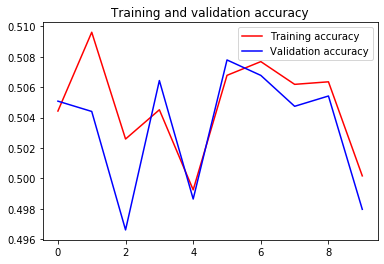

<Figure size 432x288 with 0 Axes>

In [468]:
acc = InceptionV3_history2.history['accuracy']
val_acc = InceptionV3_history2.history['val_accuracy']
loss = InceptionV3_history2.history['loss']
val_loss = InceptionV3_history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

### Xception

In [263]:
from keras.applications.xception import Xception
K.clear_session()
pre_trained_model = Xception(include_top=False, input_shape=(150, 150, 3),weights='imagenet')  
for layer in pre_trained_model.layers:
    layer.trainable = False
x = Flatten()(pre_trained_model.layers[-1].output)
x = Dense(1024, activation='relu', kernel_initializer='he_uniform',
          kernel_regularizer=l2(0.001))(x)
x = Dropout(0.3)(x)  
x = Dense(1, activation='sigmoid')(x)

83689472/83683744 [==============================] - 4s 0us/step


In [264]:
Xception_model = Model(pre_trained_model.input, outputs=x) 
Xception_model.compile(optimizer=Adam(lr=0.01), loss = 'binary_crossentropy', 
                       metrics = ['accuracy'])

In [265]:
Xception_history2=Xception_model.fit_generator(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch =  X_train.shape[0]/batch_size,
            epochs=10,
            validation_steps = X_val.shape[0]/batch_size
            )

Epoch 1/10
374/374 [==============================] - 1610s 4s/step - loss: 12.1652 - accuracy: 0.4977 - val_loss: 1.8696 - val_accuracy: 0.5085
Epoch 2/10
374/374 [==============================] - 1618s 4s/step - loss: 1.3726 - accuracy: 0.5088 - val_loss: 0.9985 - val_accuracy: 0.5027
Epoch 3/10
374/374 [==============================] - 1608s 4s/step - loss: 0.9071 - accuracy: 0.5058 - val_loss: 0.7491 - val_accuracy: 0.5051
Epoch 4/10
374/374 [==============================] - 1607s 4s/step - loss: 0.9926 - accuracy: 0.5064 - val_loss: 1.0551 - val_accuracy: 0.5081
Epoch 5/10
374/374 [==============================] - 1607s 4s/step - loss: 1.1658 - accuracy: 0.4978 - val_loss: 0.9304 - val_accuracy: 0.5014
Epoch 6/10
374/374 [==============================] - 1607s 4s/step - loss: 0.9788 - accuracy: 0.5087 - val_loss: 1.8045 - val_accuracy: 0.5041
Epoch 7/10
374/374 [==============================] - 1607s 4s/step - loss: 1.6793 - accuracy: 0.5025 - val_loss: 1.4020 - val_accuracy

In [266]:
Xception_model.save("Xception_model.h5")

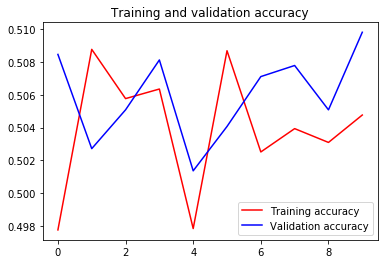

<Figure size 432x288 with 0 Axes>

In [469]:
acc = Xception_history2.history['accuracy']
val_acc = Xception_history2.history['val_accuracy']
loss = Xception_history2.history['loss']
val_loss = Xception_history2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

### Use Features from Images for fitting

Since none of the above CNNs worked, the next stop was to obtain features by running the images through a pretrained model (InceptionV3) and then using those features as outputs to determine if that increases predictability.

In [277]:
# Modified from https://www.kaggle.com/christofhenkel/extract-image-features-from-pretrained-nn
from keras.layers import Input, Lambda, GlobalAveragePooling2D, AveragePooling1D

inp = Input((150, 150, 3))
backbone=InceptionV3(include_top=False, input_tensor=inp , weights='imagenet')  
x = backbone.output
x = GlobalAveragePooling2D()(x)
x = Lambda(lambda x: K.expand_dims(x, axis=-1))(x)
x = AveragePooling1D(4)(x)
out = Lambda(lambda x: x[:, :, 0])(x)
model_dense = Model(inp, out)

In [321]:
# One hot encode categorical data
X_dense=X2.copy()
categorical = ['Dewormed', 'Sterilized', 'Breed1', 'Type', 'Breed2', 'State', 'Gender', 'Color1', 
                'Color2', 'Color3', 'MaturitySize', 'FurLength']

for feat in categorical:
    encoder = LabelEncoder()
    encoder.fit(X_dense[feat].append(X_dense[feat]))
    X_dense[feat + '_encoded'] = encoder.transform(X_dense[feat])

In [323]:
# Standardize numerical features
numerical = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt']

for feat in numerical:
    scaler = StandardScaler()    
    X_dense[feat + '_std'] = scaler.fit_transform(np.array(X_dense[feat]).reshape(-1,1))    

In [326]:
#all_features = categorical+numerical
X_dense2=pd.concat([X_dense[[x + '_encoded' for x in categorical]],
                    X_dense[[x + '_std' for x in numerical]]],axis=1)

# Define outcome variable as the Adoption Speed
y_dense = X_dense['Binary']

In [327]:
X_dense_img_train = X[:11698]
X_dense_num_train = X_dense2[:11698]
X_dense_img_val = X[11698:]
X_dense_num_val = X_dense2[11698:]
y_dense_train = y_dense[:11698]
y_dense_val = y_dense[11698:]

In [360]:
preds_dense = model_dense.predict(X_dense_img_train)

In [361]:
vals_dense = model_dense.predict(X_dense_img_val)

In [367]:
rfc_dense = RandomForestClassifier() 
rfc_dense.fit(preds_dense, y_dense_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [371]:
print(classification_report(y_dense_val, pred_rfc_dense))

              precision    recall  f1-score   support

           0       0.52      0.64      0.57      1526
           1       0.49      0.38      0.43      1428

    accuracy                           0.51      2954
   macro avg       0.51      0.51      0.50      2954
weighted avg       0.51      0.51      0.50      2954



In [379]:
rfc_dense = RandomForestClassifier() 
rfc_dense.fit(preds_dense, y_dense_train) 
pred_rfc_dense =rfc_dense.predict(vals_dense) 

print('Training set accuracy:\t\t', round(rfc_dense.score(preds_dense, y_dense_train),2))
print('Validation set accuracy:\t', round(rfc_dense.score(vals_dense,y_dense_val),2))
print('\n',classification_report(y_dense_val, pred_rfc_dense))

Training set accuracy:		 0.98
Validation set accuracy:	 0.51

               precision    recall  f1-score   support

           0       0.52      0.64      0.57      1526
           1       0.49      0.38      0.43      1428

    accuracy                           0.51      2954
   macro avg       0.51      0.51      0.50      2954
weighted avg       0.51      0.51      0.50      2954



In [380]:
xgb_dense = XGBClassifier() 
xgb_dense.fit(preds_dense, y_dense_train) 
pred_xgb_dense =xgb_dense.predict(vals_dense) 

print('Training set accuracy:\t\t', round(xgb_dense.score(preds_dense, y_dense_train),2))
print('Validation set accuracy:\t', round(xgb_dense.score(vals_dense,y_dense_val),2))
print('\n',classification_report(y_dense_val, pred_xgb_dense))

Training set accuracy:		 0.71
Validation set accuracy:	 0.52

               precision    recall  f1-score   support

           0       0.53      0.52      0.53      1526
           1       0.50      0.51      0.50      1428

    accuracy                           0.52      2954
   macro avg       0.52      0.52      0.52      2954
weighted avg       0.52      0.52      0.52      2954



There do not appear to be any features in the images that correlate with the adoption rates.

## Wide and Deep

Since it was difficult to classify the images, the next step was to combine the NLP analysis and the numerical and categorical data. This was done using a Wide and Deep model, which combines sparse and dense data.

In [14]:
import keras
from keras import layers

Using TensorFlow backend.


The code below was modified from https://medium.com/tensorflow/predicting-the-price-of-wine-with-the-keras-functional-api-and-tensorflow-a95d1c2c1b03.

In [76]:
# One hot encode categorical data
df_all['binary']= np.where(df_all.AdoptionSpeed<3, 0, 1)
categorical = ['Dewormed', 'Health', 'Breed1', 'Type', 'Breed2', 'State', 'Gender', 'Color1', 
                'Color2', 'Color3', 'MaturitySize', 'FurLength']

for feat in categorical:
    encoder = LabelEncoder()
    encoder.fit(df_all[feat].append(df_all[feat]))
    df_all[feat + '_encoded'] = encoder.transform(df_all[feat])

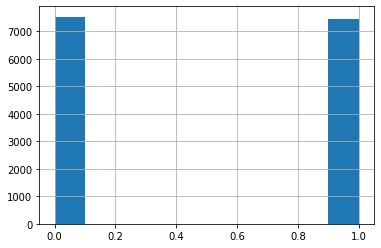

In [77]:
df_all['binary'].hist()

In [78]:
# Standardize numerical features
numerical = ['Age', 'Quantity', 'Fee', 'VideoAmt', 'PhotoAmt','Name_Len','count']

for feat in numerical:
    scaler = StandardScaler()    
    df_all[feat + '_std'] = scaler.fit_transform(np.array(df_all[feat]).reshape(-1,1))    

In [79]:
#all_features = categorical+numerical
X=pd.concat([df_all[[x + '_encoded' for x in categorical]],
             df_all[[x + '_std' for x in numerical]]],axis=1)

In [80]:
train_size = int(len(df_all) * .8)
description_train = df_all['Description'][:train_size]
description_val = df_all['Description'][train_size:]

In [81]:
# Define outcome variable as the Adoption Speed
labels_train =  df_all['binary'][:train_size]
labels_val = df_all['binary'][train_size:]

'''labels_train =  df_all['AdoptionSpeed'][:train_size]
labels_train = keras.utils.to_categorical(labels_train, 5)
labels_test = df_all['AdoptionSpeed'][train_size:]
labels_test = keras.utils.to_categorical(labels_test, 5)
'''

"labels_train =  df_all['AdoptionSpeed'][:train_size]\nlabels_train = keras.utils.to_categorical(labels_train, 5)\nlabels_test = df_all['AdoptionSpeed'][train_size:]\nlabels_test = keras.utils.to_categorical(labels_test, 5)\n"

In [94]:
X_train = X[:train_size]
X_val = X[train_size:]

In [95]:
X_train.head()

,Dewormed_encoded,Health_encoded,Breed1_encoded,Type_encoded,Breed2_encoded,State_encoded,Gender_encoded,Color1_encoded,Color2_encoded,Color3_encoded,MaturitySize_encoded,FurLength_encoded,Age_std,Quantity_std,Fee_std,VideoAmt_std,PhotoAmt_std,Name_Len_std,count_std
0,1,0,167,1,0,2,0,0,6,0,0,0,-0.410368,-0.391223,1.004090,-0.164031,-0.828525,-0.363039,0.086520
1,2,0,136,1,0,12,0,0,1,0,1,1,-0.520559,-0.391223,-0.271112,-0.164031,-0.541877,-1.170125,-0.577251
2,0,0,175,0,0,2,0,1,6,0,1,1,-0.520559,-0.391223,-0.271112,-0.164031,0.891361,-0.363039,0.086520
3,0,0,175,0,0,12,1,0,1,0,1,0,-0.355273,-0.391223,1.641691,-0.164031,1.178009,-0.632068,-0.548391
4,1,0,175,0,0,2,0,0,0,0,1,0,-0.520559,-0.391223,-0.271112,-0.164031,-0.255230,-0.363039,0.259678


In [33]:
y_train.shape

(18436,)

In [96]:
from keras import backend as K
K.clear_session()

In [97]:
vocab_size = 150
tokenize = keras.preprocessing.text.Tokenizer(num_words=vocab_size, char_level=False)
tokenize.fit_on_texts(description_train) # only fit on train

In [98]:
description_bow_train = tokenize.texts_to_matrix(description_train)
description_bow_val = tokenize.texts_to_matrix(description_val)

In [99]:
bow_inputs = layers.Input(shape=(vocab_size,))
variety_inputs = layers.Input(shape=(X_train.shape[1],))
merged_layer = layers.concatenate([bow_inputs, variety_inputs])
merged_layer = layers.Dense(256, activation='relu')(merged_layer)
merged_layer = layers.Dropout(0.3)(merged_layer)
predictions = layers.Dense(1,activation='sigmoid')(merged_layer)
wide_model = keras.Model(inputs=[bow_inputs, variety_inputs], outputs=predictions)

In [100]:
wide_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [101]:
train_embed = tokenize.texts_to_sequences(description_train)
val_embed = tokenize.texts_to_sequences(description_val)

In [102]:
max_seq_length = 150
train_embed = keras.preprocessing.sequence.pad_sequences(train_embed, maxlen=max_seq_length)
val_embed = keras.preprocessing.sequence.pad_sequences(val_embed, maxlen=max_seq_length)

In [103]:
deep_inputs = layers.Input(shape=(max_seq_length,))
embedding = layers.Embedding(vocab_size, 8,   input_length=max_seq_length)(deep_inputs)
embedding = layers.Flatten()(embedding)
embedding = layers.Dropout(0.3)(embedding)
embed_out = layers.Dense(1, activation='sigmoid')(embedding)
deep_model = keras.Model(inputs=deep_inputs, outputs=embed_out)
deep_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [104]:
merged_out = layers.concatenate([wide_model.output, deep_model.output])
merged_out = layers.Dense(1,activation='sigmoid')(merged_out)
combined_model = keras.Model(wide_model.input + [deep_model.input], merged_out)
combined_model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [108]:
combined_model.fit([description_bow_train, X_train] + [train_embed], labels_train, epochs=10, batch_size=128)

Epoch 1/10
11984/11984 [==============================] - 1s 56us/step - loss: 0.6764 - acc: 0.5829
Epoch 2/10
11984/11984 [==============================] - 1s 71us/step - loss: 0.6731 - acc: 0.5896
Epoch 3/10
11984/11984 [==============================] - 1s 65us/step - loss: 0.6699 - acc: 0.5986
Epoch 4/10
11984/11984 [==============================] - 1s 62us/step - loss: 0.6678 - acc: 0.6040
Epoch 5/10
11984/11984 [==============================] - 1s 71us/step - loss: 0.6630 - acc: 0.6092
Epoch 6/10
11984/11984 [==============================] - 1s 70us/step - loss: 0.6598 - acc: 0.6195
Epoch 7/10
11984/11984 [==============================] - 1s 67us/step - loss: 0.6567 - acc: 0.6209
Epoch 8/10
11984/11984 [==============================] - 1s 69us/step - loss: 0.6547 - acc: 0.6196
Epoch 9/10
11984/11984 [==============================] - 1s 69us/step - loss: 0.6511 - acc: 0.6278
Epoch 10/10
11984/11984 [==============================] - 1s 71us/step - loss: 0.6486 - acc: 0.6296

In [109]:
combined_model.fit([description_bow_train, X_train] + [train_embed], labels_train, epochs=20, batch_size=32,
                   validation_data=([description_bow_val, X_val] + [val_embed], labels_val))

Train on 11984 samples, validate on 2997 samples
Epoch 1/20
11984/11984 [==============================] - 2s 168us/step - loss: 0.6484 - acc: 0.6258 - val_loss: 0.6740 - val_acc: 0.5819
Epoch 2/20
11984/11984 [==============================] - 2s 155us/step - loss: 0.6438 - acc: 0.6319 - val_loss: 0.6734 - val_acc: 0.5846
Epoch 3/20
11984/11984 [==============================] - 2s 150us/step - loss: 0.6399 - acc: 0.6357 - val_loss: 0.6759 - val_acc: 0.5766
Epoch 4/20
11984/11984 [==============================] - 2s 157us/step - loss: 0.6344 - acc: 0.6433 - val_loss: 0.6758 - val_acc: 0.5816
Epoch 5/20
11984/11984 [==============================] - 2s 151us/step - loss: 0.6328 - acc: 0.6444 - val_loss: 0.6766 - val_acc: 0.5873
Epoch 6/20
11984/11984 [==============================] - 2s 142us/step - loss: 0.6302 - acc: 0.6439 - val_loss: 0.6789 - val_acc: 0.5752
Epoch 7/20
11984/11984 [==============================] - 2s 157us/step - loss: 0.6264 - acc: 0.6516 - val_loss: 0.6802 - v

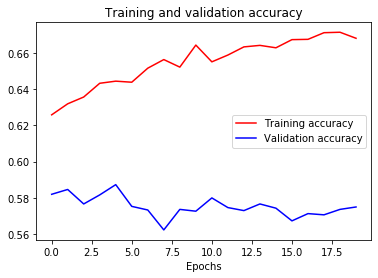

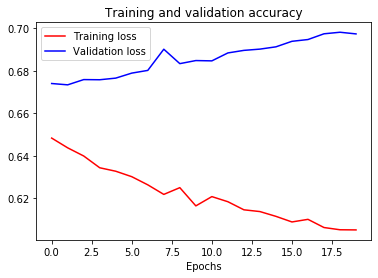

<Figure size 432x288 with 0 Axes>

In [116]:
acc = combined_model.history.history['acc']
val_acc = combined_model.history.history['val_acc']
loss = combined_model.history.history['loss']
val_loss = combined_model.history.history['val_loss']
            
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend(loc=0)
plt.figure()


plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.legend(loc=0)
plt.figure()

plt.show()

In [114]:
print(combined_model.history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


In [541]:
y_pred = combined_model.predict([description_bow__final_test, X_test] + [test_embed_final])

In [545]:
print(confusion_matrix(labels_test_final, y_pred2))

[[  383  3115]
 [  124 11359]]


In [544]:
y_pred2 = np.where(y_pred<0.5,0,1)

In [548]:
print(classification_report(labels_test_final, y_pred2))

              precision    recall  f1-score   support

           0       0.76      0.11      0.19      3498
           1       0.78      0.99      0.88     11483

    accuracy                           0.78     14981
   macro avg       0.77      0.55      0.53     14981
weighted avg       0.78      0.78      0.72     14981

